In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.shape

(918, 12)

In [7]:
df['FastingBS']

0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64

In [8]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

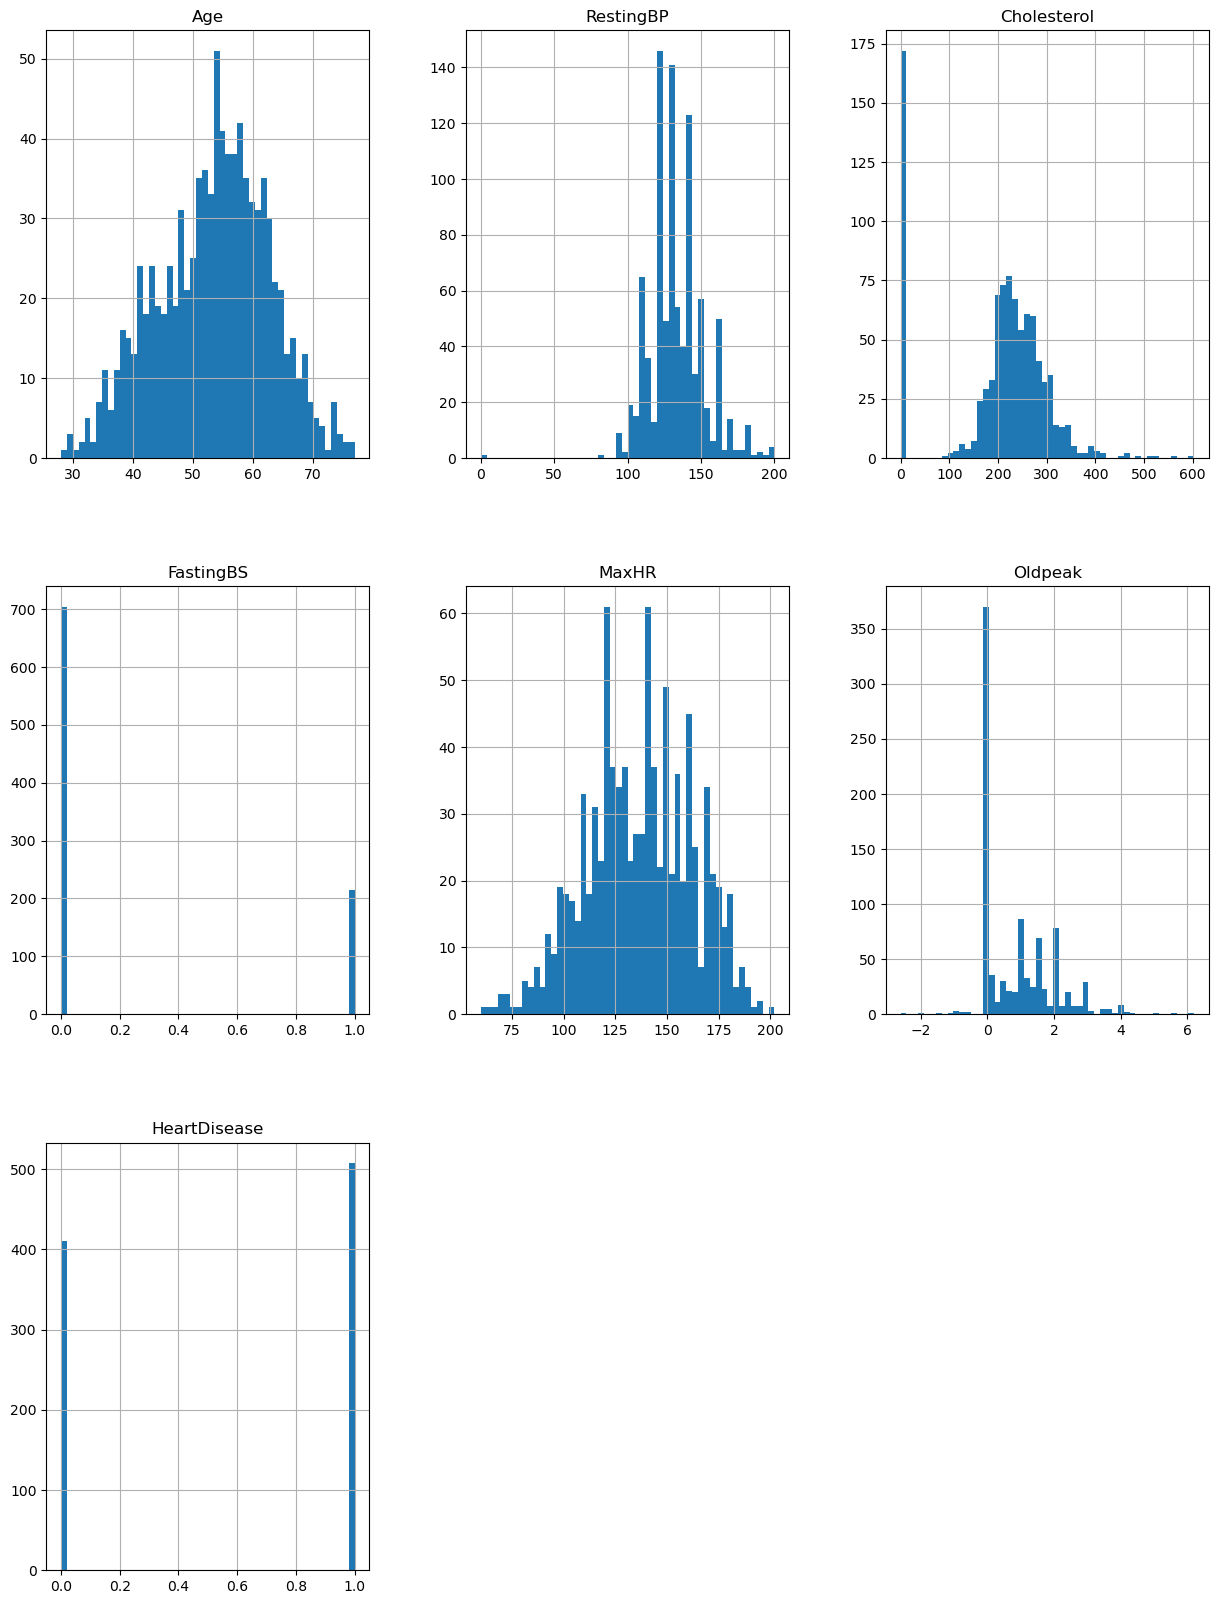

In [9]:
df.hist(bins=50,figsize=(15,20))


In [10]:
#data not imbalanced



In [11]:
x=df.drop(['HeartDisease'],axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# encoder.fit(df['Sex'])
# encoded_x=encoder.transform(df['Sex'])
# encoded_x=np.array(encoded_x)
# x['Sex']=encoded_x.reshape(-1,1)


# encoder.fit(df['ChestPainType'])
# encoded_x=encoder.transform(df['ChestPainType'])
#encoded_x=np.array(encoded_x)
#x['ChestPainType']=encoded_x.reshape(-1,1)
#encoder.fit(df['RestingECG'])
#encoder.fit(df['ExerciseAngina'])
#encoder.fit(df['ST_Slope'])


#encoded_x=encoder.transform(df['ChestPainType'])

#encoded_x=encoder.transform(df['RestingECG'])
#encoded_x=encoder.transform(df['ExerciseAngina'])
#encoded_x=encoder.transform(df['ST_Slope'])







# x


In [13]:
x1=x


In [14]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
list1=[df['Sex'],df['ChestPainType'],df['RestingECG'],df['ExerciseAngina'],df['ST_Slope']]
list_x=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

var=0
for i in list1:
    def fit_transform1(column):
        global var
        
        encoded=encoder.fit_transform(column)
        encodedx=np.array(encoded)
        encodedx=np.array(encodedx)
        #print(encodedx)
        x1[x1[list_x[var]].name]=encodedx.reshape(-1,1)
        #print(x1[x1[list_x[var]].name])
        var+=1
        #print(var)
        return x1
    
    returned=fit_transform1(i)
returned
   
    


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [16]:
x=x1

In [17]:
#list1=[df['ChestPainType'],df['RestingECG'],df['ExerciseAngina'],df['ST_Slope']]




In [18]:
#,'RestingECG',],df['ChestPainType'],df['ExerciseAngina'],df['ST_Slope']]

In [19]:
# x=x.drop(['sex'],axis=1)

In [20]:
# returned=fit_transform1(df['RestingECG'])

In [21]:
y=df['HeartDisease']

In [22]:
#x['Sex']

In [23]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,2
270,45,1,0,120,225,0,1,140,0,0.0,2
860,60,1,0,130,253,0,1,144,1,1.4,2
435,60,1,0,152,0,0,2,118,1,0.0,2


In [25]:
scaler=StandardScaler()

In [26]:
scaler.fit_transform(train_x)



array([[-1.24506731,  0.54060477,  1.31674291, ..., -0.83846064,
        -0.09706109, -2.25746543],
       [-1.8862362 ,  0.54060477,  1.31674291, ..., -0.83846064,
        -0.83628643,  1.07985506],
       [ 0.25099346,  0.54060477, -0.80974619, ...,  1.19266183,
         0.08774524, -0.58880518],
       ...,
       [ 0.67843939,  0.54060477, -0.80974619, ...,  1.19266183,
         0.45735791,  1.07985506],
       [ 0.67843939,  0.54060477, -0.80974619, ...,  1.19266183,
        -0.83628643,  1.07985506],
       [-1.45879027, -1.84978019, -0.80974619, ..., -0.83846064,
         1.01177691, -0.58880518]])

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>, <Axes: >]], dtype=object)

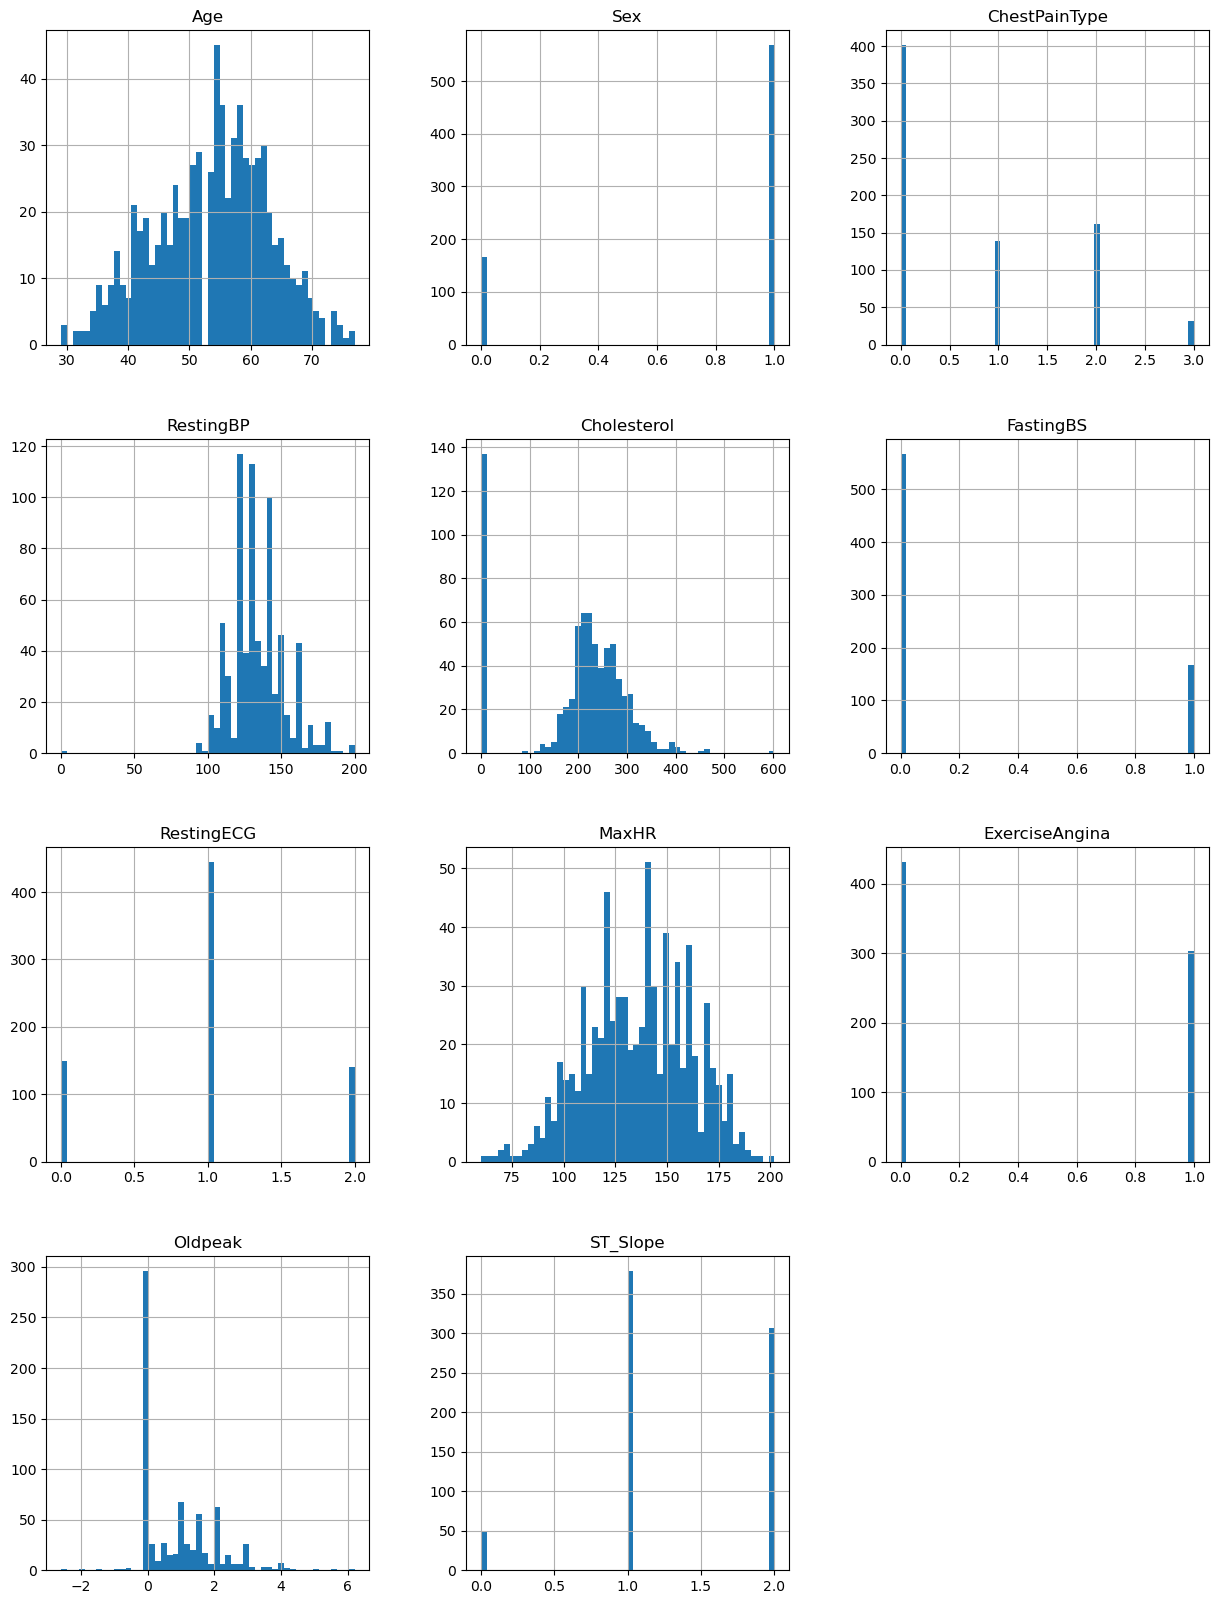

In [27]:
train_x.hist(bins=50,figsize=(15,20))

In [28]:
scaler.transform(test_x)

array([[ 0.99902384, -1.84978019,  0.25349836, ..., -0.83846064,
        -0.83628643,  1.07985506],
       [-0.06959099,  0.54060477,  1.31674291, ..., -0.83846064,
        -0.83628643, -0.58880518],
       [ 1.2127468 ,  0.54060477, -0.80974619, ..., -0.83846064,
         0.27255158, -0.58880518],
       ...,
       [ 1.10588532,  0.54060477, -0.80974619, ...,  1.19266183,
         0.54976108, -0.58880518],
       [-0.49703693,  0.54060477,  0.25349836, ..., -0.83846064,
        -0.28186743,  1.07985506],
       [ 1.10588532,  0.54060477, -0.80974619, ...,  1.19266183,
         0.08774524, -0.58880518]])

In [29]:
list_acc=[]
for i in range(1,26):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    predicted_y=model.predict(test_x)
    accuracy=accuracy_score(test_y,predicted_y)
    list_acc.append(accuracy)
list_acc
    

[0.6630434782608695,
 0.5978260869565217,
 0.6521739130434783,
 0.6793478260869565,
 0.7010869565217391,
 0.6630434782608695,
 0.6630434782608695,
 0.6413043478260869,
 0.6630434782608695,
 0.6413043478260869,
 0.6521739130434783,
 0.6467391304347826,
 0.6739130434782609,
 0.6630434782608695,
 0.6630434782608695,
 0.6358695652173914,
 0.6630434782608695,
 0.6467391304347826,
 0.6630434782608695,
 0.6521739130434783,
 0.657608695652174,
 0.657608695652174,
 0.6739130434782609,
 0.6630434782608695,
 0.657608695652174]

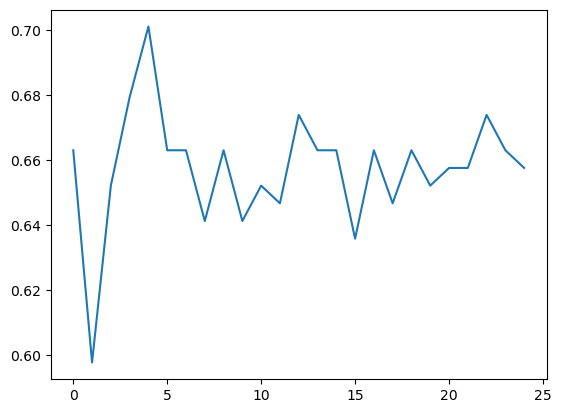

In [30]:
plt.plot(list_acc)

In [31]:
#kval =5